### Example: cross-bedded permeability

$$\beta=0$$
$$\phi=1$$
$$\kappa = 0.01$$
$$\vartheta = 45^\circ$$

In [1]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write

from py.porous_convection_anisotropic import porous_convection_anisotropic_rectangle


simulation_crossbed = porous_convection_anisotropic_rectangle(
    Lx=2.0,
    Ly=1.0,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    Ra=500.0, 
    kappa=0.1,
    vartheta=45.0,
    c_eps=1e-4, 
    c_freq=(14, 14), 
    c_seed=(456, 987), 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
integrate(simulation_crossbed, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

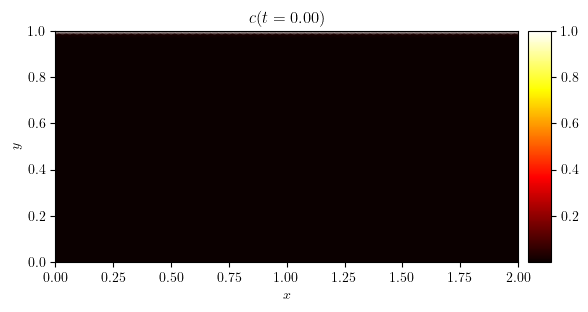

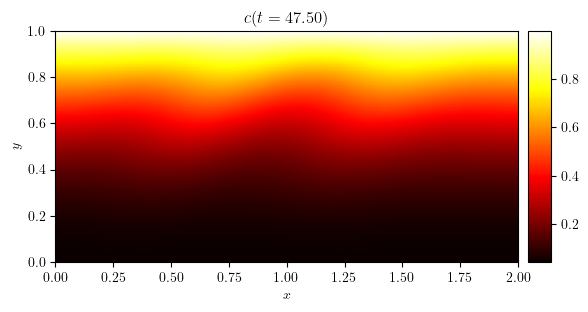

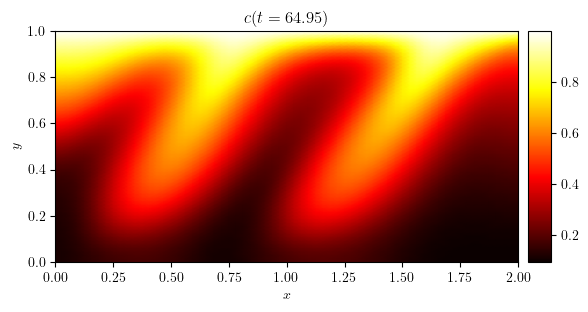

In [2]:
c = simulation_crossbed['c']

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(fig, f'A16b_porous_convection_crossbedded_c(t={c.time_series[i]:.2f})', './figures', close=False, pickle=False)